In [1]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_iris, fetch_20newsgroups
from sklearn.decomposition import PCA

# Dimensional Reduction

## Live Demo

In [4]:
iris = load_iris()

In [7]:
attrs, tgt = iris['data'], iris['target']

In [8]:
pca = PCA()

In [9]:
pca.fit(attrs)

PCA()

In [10]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [11]:
pca.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [16]:
transformed_attr = pca.transform(attrs)

In [22]:
transformed_attr.std(axis=0)

array([2.04940319, 0.49097143, 0.27872586, 0.1538707 ])

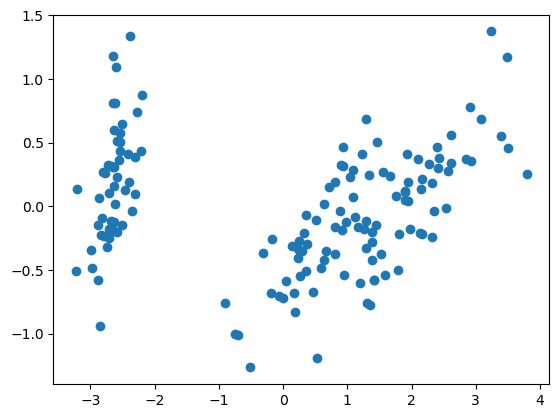

In [24]:
plt.scatter(transformed_attr[:, 0], transformed_attr[:, 1])

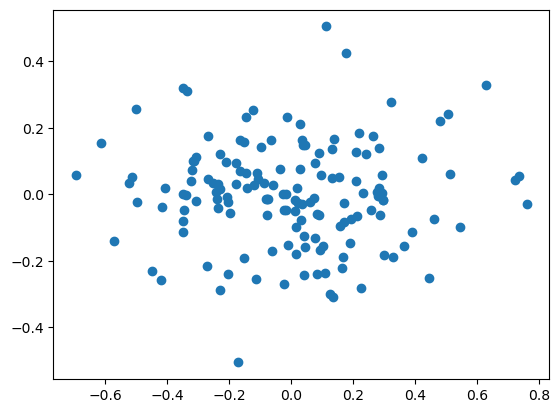

In [25]:
plt.scatter(transformed_attr[:, 2], transformed_attr[:, 3])

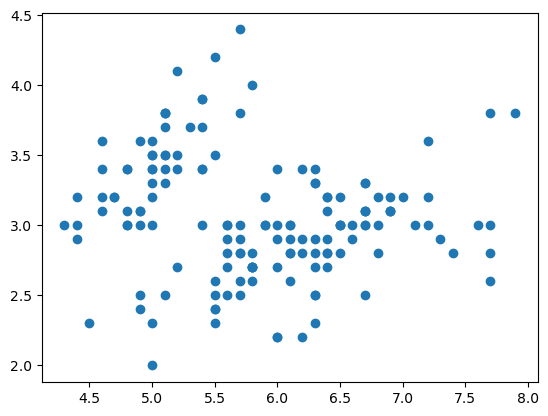

In [27]:
plt.scatter(attrs[:, 0], attrs[:, 1])

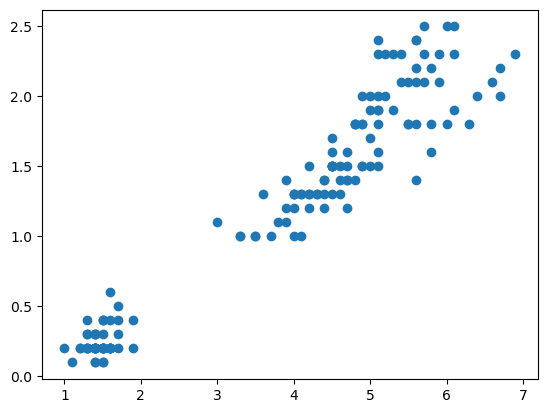

In [28]:
plt.scatter(attrs[:, 2], attrs[:, 3])

In [29]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [31]:
# this points out the importance of the features
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [33]:
pca.explained_variance_ratio_.cumsum()

array([0.92461872, 0.97768521, 0.99478782, 1.        ])

In [46]:
x = np.random.normal(loc=3.5, scale=3, size=250)
y = np.random.normal(loc=2.4, scale=2, size=250)

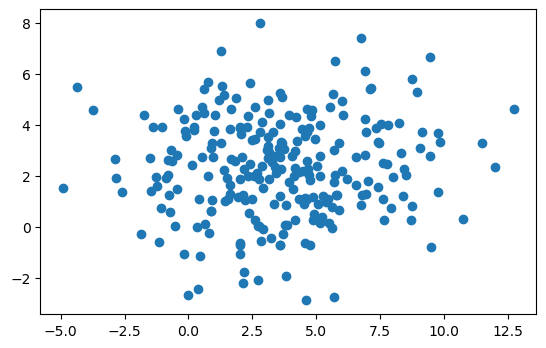

In [47]:
plt.scatter(x, y)
plt.gca().set_aspect('equal')
plt.show()

In [55]:
points = np.array([x, y]).T

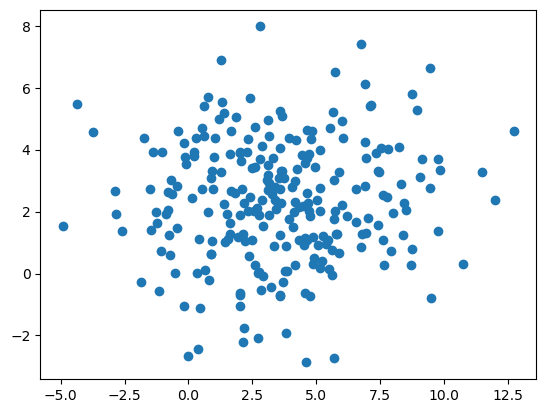

In [60]:
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [70]:
result = points @ np.array([[1, 0.5], [1, 1]]) 

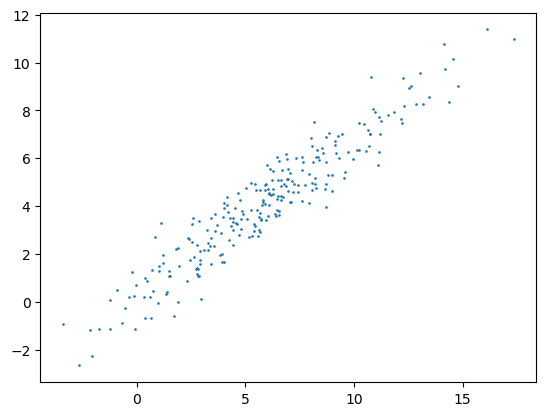

In [73]:
plt.scatter(result[:, 0], result[:, 1], s=0.8)
plt.show()

We have data points, in this case generated. This data has own coordinate system. The basis, [[0, 1], [1, 0]], does not describe well the data.
1. we must shift the center to describe the data
2. we must change the dimensions (rotate the base vectors)

In [74]:
data = result.copy()

In [77]:
# find the center
data.mean(axis=0)

array([5.89129734, 4.11219483])

In [ ]:
# this should be the center

In [78]:
# check how similar th correaltion and covariations are

In [84]:
covariance_matrix = np.cov(data, rowvar=False)

In [82]:
np.corrcoef(data, rowvar=False)

array([[1.        , 0.94979864],
       [0.94979864, 1.        ]])

so I want the matrix of covarriations in the data to be represented
 in different way
[2000, 0]
[0,    18]
This is called 'diagonalization'

In [88]:
vecotrs = np.linalg.eig(covariance_matrix).eigenvectors

In [93]:
# to see that the vetors are ortigonal
vecotrs[:, 0].dot(vecotrs[:, 1])

0.0

In [94]:
data

array([[ 1.61220124e+01,  1.13868898e+01],
       [ 2.44263554e+00,  1.72866694e+00],
       [ 1.22091231e+01,  7.48905898e+00],
       [ 6.85144867e+00,  6.19323769e+00],
       [ 6.96713069e+00,  5.53490618e+00],
       [ 7.33268554e+00,  6.02418131e+00],
       [ 3.11336906e+00,  2.15074987e+00],
       [ 4.31580862e+00,  3.48624017e+00],
       [ 1.07109283e+01,  6.49714102e+00],
       [ 8.70737015e+00,  5.86074045e+00],
       [ 5.05036426e+00,  4.75066710e+00],
       [ 9.60736008e+00,  5.41765126e+00],
       [ 9.30780809e+00,  6.01948223e+00],
       [ 1.18166409e+01,  7.91507363e+00],
       [-2.11889359e+00, -1.19971130e+00],
       [ 5.94077503e+00,  4.92588200e+00],
       [ 6.44184078e+00,  6.06722733e+00],
       [ 5.26182944e+00,  3.82374609e+00],
       [ 1.04419268e+01,  7.41261808e+00],
       [ 2.78916754e+00,  1.41283832e+00],
       [ 6.95034433e-01,  1.33657916e+00],
       [ 1.02499196e+01,  7.47383504e+00],
       [ 2.64636847e+00,  1.87709070e+00],
       [-9.

In [95]:
pca.fit(data).components_

array([[ 0.83143799,  0.55561755],
       [-0.55561755,  0.83143799]])

In [96]:
transformed_data = pca.transform(data)

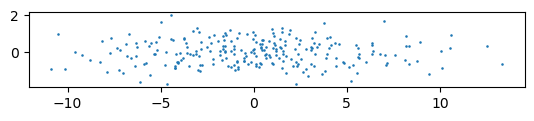

In [99]:
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], s=0.7)
plt.gca().set_aspect('equal')
plt.show()

In [100]:
# reducing by removing the 2nd feature
# plotting data in 1dimn

In [101]:
pca = PCA(n_components=1)
pca.fit(data)
transformed_data = pca.transform(data)

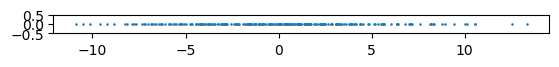

In [111]:
plt.scatter(transformed_data[:,0], [0] * len(transformed_data), s=0.7)
plt.ylim(-0.5, 0.5)
plt.gca().set_aspect('equal')
plt.show()